In [32]:
suppressPackageStartupMessages(library(shinydashboard))
suppressPackageStartupMessages(library(shiny))
suppressPackageStartupMessages(library(DT))
suppressPackageStartupMessages(library(jsonlite))
suppressPackageStartupMessages(library(googleVis))
suppressPackageStartupMessages(library(leaflet))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggthemes))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(maps))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(urbnmapr))
suppressPackageStartupMessages(library(urbnthemes))

In [26]:
devtools::install_github("UI-Research/urbnthemes")

conflicted (NA    -> 1.0.3) [CRAN]
ggrepel    (0.8.0 -> 0.8.1) [CRAN]
stringi    (1.2.4 -> 1.4.3) [CRAN]
stringr    (1.3.1 -> 1.4.0) [CRAN]


Installing 4 packages: conflicted, ggrepel, stringi, stringr
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


✔  checking for file ‘/private/var/folders/w1/bnmgrccj647f_rv2p9gztqqc0000gn/T/RtmppoG91R/remotes35f5ac50140/UI-Research-urbnthemes-3cdb34e/DESCRIPTION’ (387ms)
─  preparing ‘urbnthemes’:
✔  checking DESCRIPTION meta-information ...
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘urbnthemes_0.0.1.tar.gz’
   


In [17]:
njmls_data <- fromJSON('cleaned_njmls_data.json')

In [18]:
# Get rid of unwanted columns

njmls_data$address=NULL
njmls_data$'mls#'=NULL
njmls_data$basement=NULL
njmls_data$rooms=NULL
njmls_data$garage=NULL
njmls_data$monthly_maintenance=NULL
njmls_data$list_date=NULL

In [19]:
#Vector for Select input for the Map selector
#njmls_data$'category' = as.factor(njmls_data$'category')
#njmls_data$'style' = as.factor(njmls_data$'style')
## Need to apply trim function on following columns
#category, style, town, county, 

njmls_data <- njmls_data %>%
  mutate_if(is.character, str_trim)

njmls_data$'current_price' = as.double(njmls_data$'current_price')

In [20]:
njmls_data

bedrooms,category,full_baths,half_baths,current_price,original_price,previous_price,style,taxes,town,county,zipcode,city_url,property_url
3,Condo/Coop/Townhouse,2,1,649900,659900,NA,Townhouse,12351,Allendale,Bergen,07401,https://www.njmls.com/listings/index.cfm?action2=xhr.results.view.list&action=dsp.results&city=Allendale&county=Bergen&state=NJ&zipcode=07401&radius=&proptype=1%2C3a%2C3b%2C2%2C4%2C8%2C5%2C7%2C9&searchtype=sale&mlsSearch=1&status=A,https://www.njmls.com/listings/index.cfm?action=dsp.info&mlsnum=1913733&dayssince=15&countysearch=false
4,Residential,2,1,950000,998000,975000,Colonial,23511,Allendale,Bergen,07401,https://www.njmls.com/listings/index.cfm?action2=xhr.results.view.list&action=dsp.results&city=Allendale&county=Bergen&state=NJ&zipcode=07401&radius=&proptype=1%2C3a%2C3b%2C2%2C4%2C8%2C5%2C7%2C9&searchtype=sale&mlsSearch=1&status=A,https://www.njmls.com/listings/index.cfm?action=dsp.info&mlsnum=1907979&dayssince=15&countysearch=false
5,Residential,4,0,689000,709800,NA,Colonial,14271,Allendale,Bergen,07401,https://www.njmls.com/listings/index.cfm?action2=xhr.results.view.list&action=dsp.results&city=Allendale&county=Bergen&state=NJ&zipcode=07401&radius=&proptype=1%2C3a%2C3b%2C2%2C4%2C8%2C5%2C7%2C9&searchtype=sale&mlsSearch=1&status=A,https://www.njmls.com/listings/index.cfm?action=dsp.info&mlsnum=1919892&dayssince=15&countysearch=false
2,Rentals-Residential,2,0,2600,NA,NA,House,NA,Allendale,Bergen,07401,https://www.njmls.com/listings/index.cfm?action2=xhr.results.view.list&action=dsp.results&city=Allendale&county=Bergen&state=NJ&zipcode=07401&radius=&proptype=1%2C3a%2C3b%2C2%2C4%2C8%2C5%2C7%2C9&searchtype=sale&mlsSearch=1&status=A,https://www.njmls.com/listings/index.cfm?action=dsp.info&mlsnum=1925205&dayssince=15&countysearch=false
4,Residential,3,0,999999,1025000,NA,Split Level,18364,Allendale,Bergen,07401,https://www.njmls.com/listings/index.cfm?action2=xhr.results.view.list&action=dsp.results&city=Allendale&county=Bergen&state=NJ&zipcode=07401&radius=&proptype=1%2C3a%2C3b%2C2%2C4%2C8%2C5%2C7%2C9&searchtype=sale&mlsSearch=1&status=A,https://www.njmls.com/listings/index.cfm?action=dsp.info&mlsnum=1918272&dayssince=15&countysearch=false
4,Rentals-Residential,3,0,5500,NA,NA,House,NA,Allendale,Bergen,07401,https://www.njmls.com/listings/index.cfm?action2=xhr.results.view.list&action=dsp.results&city=Allendale&county=Bergen&state=NJ&zipcode=07401&radius=&proptype=1%2C3a%2C3b%2C2%2C4%2C8%2C5%2C7%2C9&searchtype=sale&mlsSearch=1&status=A,https://www.njmls.com/listings/index.cfm?action=dsp.info&mlsnum=1925108&dayssince=15&countysearch=false
4,Residential,3,2,849000,NA,NA,Colonial,20225,Allendale,Bergen,07401,https://www.njmls.com/listings/index.cfm?action2=xhr.results.view.list&action=dsp.results&city=Allendale&county=Bergen&state=NJ&zipcode=07401&radius=&proptype=1%2C3a%2C3b%2C2%2C4%2C8%2C5%2C7%2C9&searchtype=sale&mlsSearch=1&status=A,https://www.njmls.com/listings/index.cfm?action=dsp.info&mlsnum=1924981&dayssince=15&countysearch=false
4,Rentals-Residential,2,0,3000,NA,NA,House,NA,Allendale,Bergen,07401,https://www.njmls.com/listings/index.cfm?action2=xhr.results.view.list&action=dsp.results&city=Allendale&county=Bergen&state=NJ&zipcode=07401&radius=&proptype=1%2C3a%2C3b%2C2%2C4%2C8%2C5%2C7%2C9&searchtype=sale&mlsSearch=1&status=A,https://www.njmls.com/listings/index.cfm?action=dsp.info&mlsnum=1924908&dayssince=15&countysearch=false
3,Residential,2,1,499000,NA,NA,Colonial,10240,Allendale,Bergen,07401,https://www.njmls.com/listings/index.cfm?action2=xhr.results.view.list&action=dsp.results&city=Allendale&county=Bergen&state=NJ&zipcode=07401&radius=&proptype=1%2C3a%2C3b%2C2%2C4%2C8%2C5%2C7%2C9&searchtype=sale&mlsSearch=1&status=A,https://www.njmls.com/listings/index.cfm?action=dsp.info&mlsnum=1924887&dayssince=15&countysearch=false
6,Residential,6,1,899000,950000,NA,Colonial,24759,Allendale,Bergen,07401,https://www.njmls.com/listings/index.cfm?action2=xhr.results.view.list&action=dsp.results&city=Allendale&count

In [16]:
summary.default(njmls_data)

               Length Class  Mode     
bedrooms       3516   -none- numeric  
category       3516   -none- character
full_baths     3516   -none- numeric  
half_baths     3516   -none- numeric  
current_price  3516   -none- numeric  
original_price 3516   -none- numeric  
previous_price 3516   -none- numeric  
style          3516   -none- character
taxes          3516   -none- numeric  
town           3516   -none- character
county         3516   -none- character
zipcode        3516   -none- character
city_url       3516   -none- character
property_url   3516   -none- character

In [5]:
unique(njmls_data$county)

[1] "Bergen"    "Sussex"    "Monmouth"  "Hudson"    "Ocean"     "Warren"   
 [7] "Essex"     "Passaic"   "Morris"    "Union"     "Middlesex" "Somerset" 
[13] "Mercer"

In [38]:
## Using this we can create a graph to show average price per county for all the cities within that county
summary_df = njmls_data %>%
    group_by(county,town,category) %>%
    filter(county=='Bergen' & town=='Allendale') %>%
    summarise(avg_current_price=mean(current_price))
summary_df

county,town,category,avg_current_price
Bergen,Allendale,Commercial,5000.00
Bergen,Allendale,Condo/Coop/Townhouse,607199.75
Bergen,Allendale,Rentals-Residential,3043.75
Bergen,Allendale,Residential,802952.13


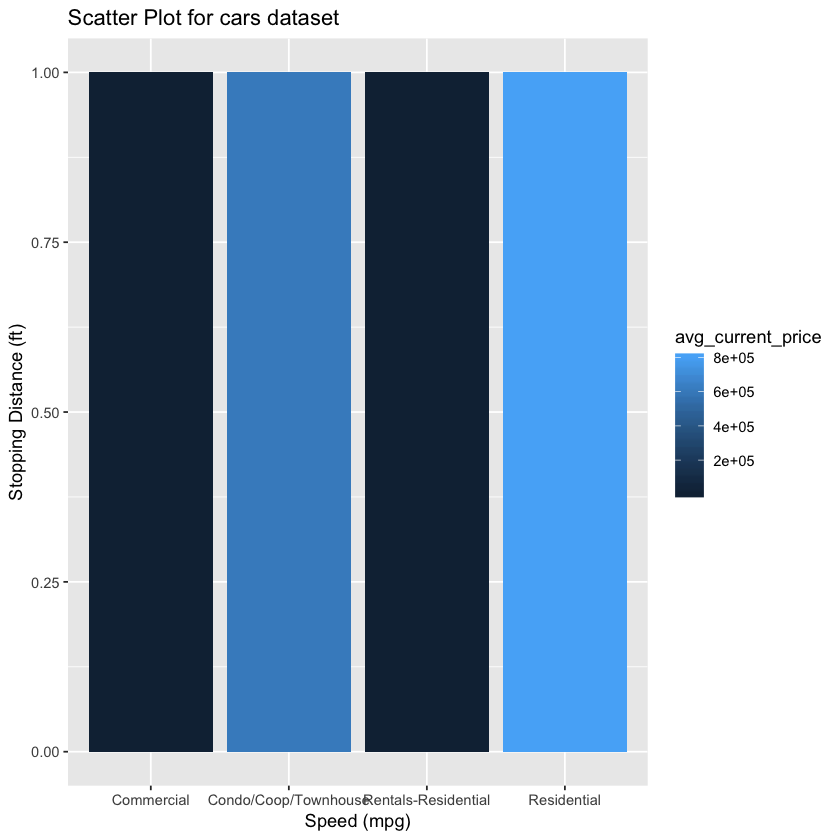

In [45]:
summary_df_plot = summary_df  %>% 
  ggplot(aes(x=category)) +
  geom_bar(aes(fill=avg_current_price), position = "dodge") +
  ggtitle("Scatter Plot for cars dataset") +
  xlab("Speed (mpg)") +
  ylab("Stopping Distance (ft)")
summary_df_plot

In [ ]:
summary_df
barplot_boro_grade =  
    ggplot(data = inspections, aes(x=inspections$boro)) +
    geom_bar(aes(fill=inspections$grade), position = "dodge") +
    xlab("Borough") + 
    labs(fill = "Grade")
# Questions that can be answered for each city and town
#1. average current price
#2. average tax
#3. average bedrooms
#4. average bathrooms

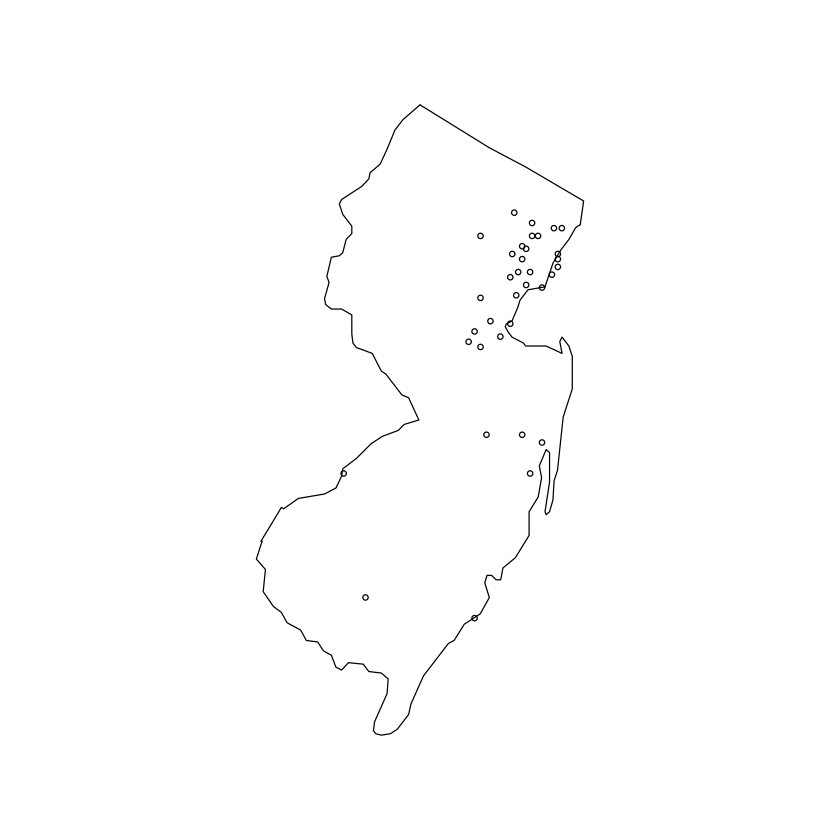

In [51]:
map("state", "New Jersey")
data(us.cities)
map.cities(us.cities, country="NJ")

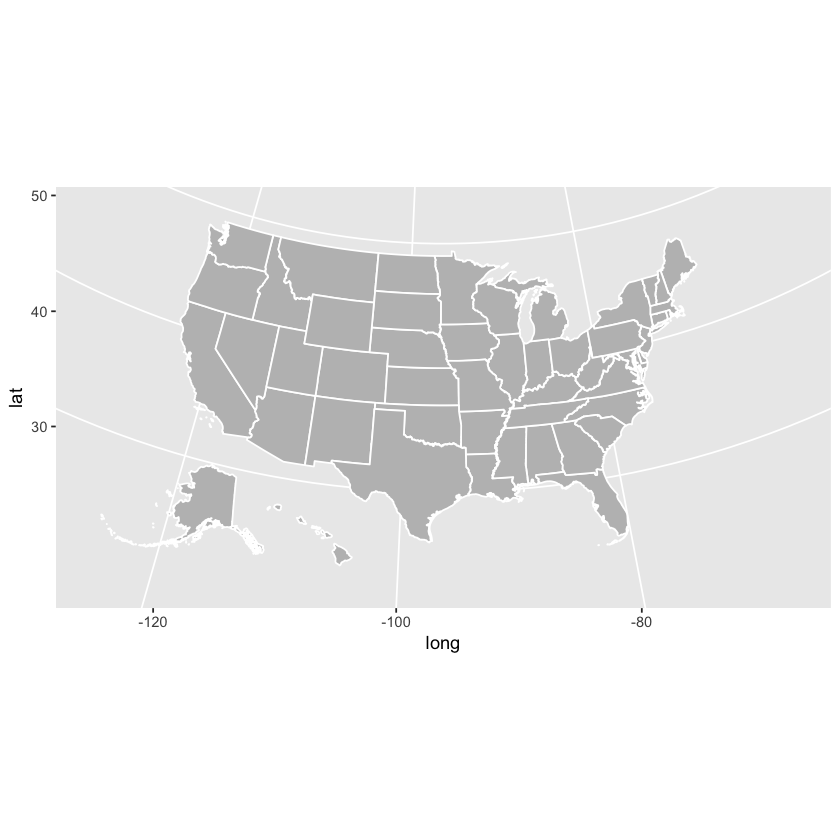

In [21]:
ggplot() + 
  geom_polygon(data = urbnmapr::states, mapping = aes(x = long, y = lat, group = group),
               fill = 'grey', color = 'white') +
  coord_map(projection = 'albers', lat0 = 39, lat1 = 45)

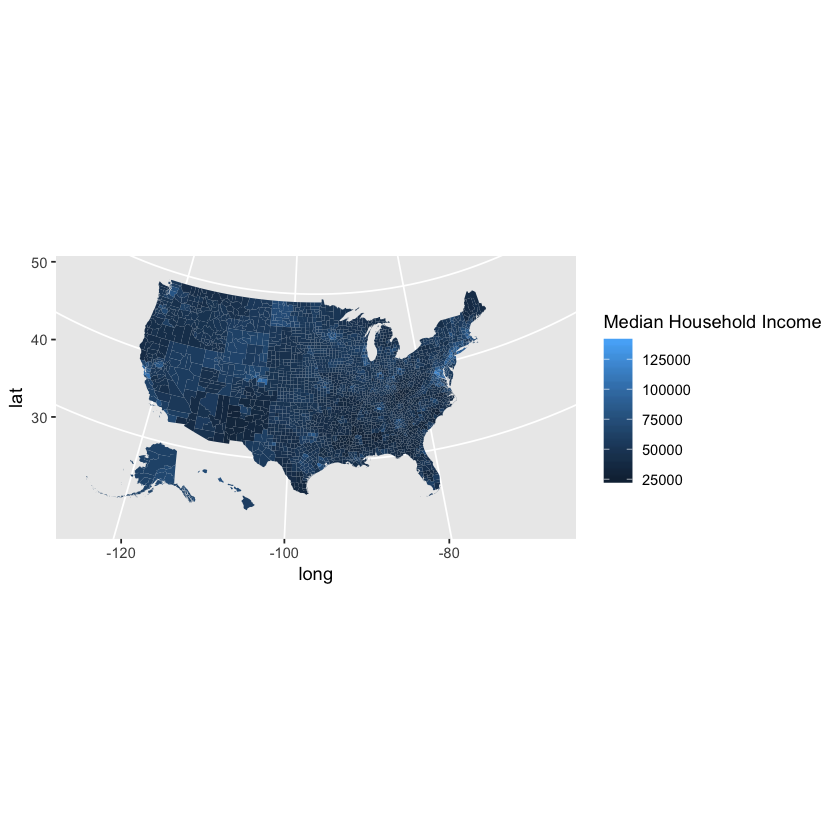

In [22]:
household_data <- left_join(countydata, counties, by = "county_fips") 

household_data %>%
  ggplot(aes(long, lat, group = group, fill = medhhincome)) +
  geom_polygon(color = NA) +
  coord_map(projection = "albers", lat0 = 39, lat1 = 45) +
  labs(fill = "Median Household Income")

In [23]:
library("RColorBrewer")
myPalette <- colorRampPalette(rev(brewer.pal(11, "Spectral")))
#sc <- scale_colour_gradientn(colours = myPalette(100), limits=c(1, 8))

In [30]:
countydata %>% 
  left_join(counties, by = 'county_fips') %>% 
  filter(state_name =='California') %>% 
  ggplot(mapping = aes(long, lat, group = group, fill = horate)) +
  geom_polygon(color = '#ffffff', size = .25) +
  scale_fill_gradientn(labels = scales::percent,
                       guide = guide_colorbar(title.position = 'top')
                       , colors = myPalette(100)) +
  coord_map(projection = 'albers', lat0 = 39, lat1 = 45) +
  theme(legend.title = element_text(),
        legend.key.width = unit(.5, 'in')) +
  labs(fill = 'Homeownership rate') +
  theme_urban_map()

ERROR: Error in theme_urban_map(): could not find function "theme_urban_map"


In [31]:
theme_urban_map()

ERROR: Error in theme_urban_map(): could not find function "theme_urban_map"


In [10]:
household_data %>%
  ggplot(aes(long, lat, group = group, fill = horate)) +
  geom_polygon(color = NA) +
  scale_fill_gradientn(labels = scales::percent,
                       guide = guide_colorbar(title.position = "top")) +
  geom_polygon(data = states, mapping = aes(long, lat, group = group),
               fill = NA, color = "#ffffff") +
  coord_map(projection = "albers", lat0 = 39, lat1 = 45) +
  theme(legend.title = element_text(),
        legend.key.width = unit(.5, "in")) +
  labs(fill = "Homeownership rate") +
  theme_urban_map()

ERROR: Error in scale_fill_gradientn(labels = scales::percent, guide = guide_colorbar(title.position = "top")): argument "colors" is missing, with no default


In [65]:
?scale_fill_gradientn

In [ ]:
# nice article on map
# https://medium.com/@urban_institute/how-to-create-state-and-county-maps-easily-in-r-577d29300bb2